# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [45]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as st
import statsmodels

df = pd.read_csv('data/human_body_temperature.csv')

In [46]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [47]:
mean = df['temperature'].mean() 
mu = df['temperature'].std()
idealdist = np.random.normal(mean,mu,10000000)

C:\Users\b-coh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\b-coh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'body temp pdf')

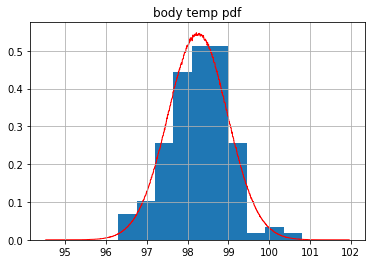

In [48]:
df['temperature'].hist(normed = True, linestyle = 'None')
plt.hist(idealdist, normed = True, histtype = 'step', bins = 1000, color = 'red')
plt.title("body temp pdf")

The mean from this distribution seems slightly biased with the actual results but the shape of the curve is simmilar so it is appropriate to estimate it as normal. 

Is the sample size large? Are the observations independent? 
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply. 

In [49]:
df.count()

temperature    130
gender         130
heart_rate     130
dtype: int64

Although 130 tuples is a small sample it is large enough for the clt to apply. Each trial is independant since one person's temperature wouldn't significantly affect the next person's.

Is the true population mean really 98.6 degrees F? 
First, try a bootstrap hypothesis test. 
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
In this situation, is it appropriate to use the 
𝑡
t
or 
𝑧
z
statistic? 
Now try using the other test. How is the result be different? Why?

In [22]:
#H0 - the pop mean = 98.6
#Alternate - the mean is not = 98.6

#To do the bootstrap test, first let's allign our data such that the mean = 98.6. 
shiftedData = df['temperature'] - df['temperature'].mean() + 98.6
shiftedData.mean()

98.59999999999992

In [28]:
size = 1000
samples = np.empty(size)
for i in range(size):
    sample = np.random.choice(shiftedData, size)
    samples[i] = sample.mean()
np.sum(samples <= df['temperature'].mean())/len(samples)





0.0

We see that the p value is 0 (in none of our trials, we got a value as extreme as our observed mean). It is therefore highly unlikely to get our results if the pop mean truly is 98.6

In [29]:
#Now let's use a one sample test (since we are given one sample)
#We should use a t stat since we don't know the true std. 

mean = df['temperature'].mean()
std = df['temperature'].std()/math.sqrt(len(df['temperature']))
tval = (mean - 98.6)/std
tval

-5.454823292364079

#We are 5 normalized deviations away from the mean. It is therefore highly unlikely wheter we use a t stat or a z stat that
#we would get these results given the null hypothesis
Now let's repeat with a size of 10 

In [33]:
df10 = np.random.choice(df['temperature'], size=10)


mean = df10.mean()
std = df10.std()/math.sqrt(len(df10))
tval = (mean - 98.6)/std
tval



-0.28526184792330467

In [34]:
st.ttest_1samp(df10, 98.6)

Ttest_1sampResult(statistic=-0.2706231506958648, pvalue=0.7927847837195696)

In [35]:
2*(1 - st.norm.cdf(abs(tval)))

0.775443539951663

In [36]:
#Let's make a confidence interval to test for normal range
std = df['temperature'].std()/math.sqrt(len(df['temperature']))
mean = df['temperature'].mean()
zval = 1.96
lowerbound = mean - 1.96 * std
upperbound = mean + 1.96 * std

print('95 percent of temperatures will be between ' + str(lowerbound) + "and " + str(upperbound))
print("the margin of error is " + str(1.96 * std))

95 percent of temperatures will be between 98.12319411222852and 98.37526742623304
the margin of error is 0.12603665700226638


In [37]:
# and from the bootstrap
size = 1000
samples = np.empty(size)
for i in range(size):
    sample = np.random.choice(df['temperature'], size)
    samples[i] = sample.mean()
mean = samples.mean()
std = samples.std()

lowerbound = mean - 1.96 * std
upperbound = mean + 1.96 * std

print('95 percent of temperatures will be between ' + str(lowerbound) + "and " + str(upperbound))
print("the margin of error is " + str(1.96 * std))


95 percent of temperatures will be between 98.20507423280957and 98.29266176719044
the margin of error is 0.04379376719043021


Now to see if there is a significant difference between Males and females, we could check to see P(M-F > 0).
Null hypothesis - there is no difference
Alternate - there is a different
We also could make a confidence interval and see if 0 is included in that interval. 

In [39]:
men = df[df['gender'] == 'M']
women = df[df['gender'] == 'F']

In [40]:
meandif = men['temperature'].mean() - women['temperature'].mean()
std = math.sqrt(men['temperature'].std()**2/len(men) + women['temperature'].std()**2/len(women))
zval = (meandif - 0)/std

In [43]:
zval

-2.285434538165274

In [44]:
p = (1-st.norm.cdf(abs(zval)))*2
p

0.022287360760677277

Our p value is below .05 so it is more likely the alternate is true, that there is a significant difference between men and women body temperatures. 